# Titanic - Machine Learning from Disaster

## Exploratory Data Analysis (EDA)

This notebook explores the Titanic dataset to understand patterns and relationships between different features and passenger survival.
The goal is to identify key insights and prepare the data for model building.

**Steps Covered**
- Checking for missing values and data types
- Univariate, bivariate, and multivariate analysis
- Outlier detection using Boxplot
- Feature insights for model preparation

In [4]:
# importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [5]:
# Loading the dataset
data = pd.read_csv('train.csv')
# data.head()

In [6]:
data.shape

(891, 12)

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Pclass
- 50 percent of the people were in 3rd class.
- atleast 75 percent of passengers were in class 2 or 3.
- so moset passengers were in 3rd class , fewer in class 1 and 2 .

### Age 
- 25% quartile = 20 → 25% of people are below 20 years.
- Median (50%) = 28 → Half the passengers are younger than 28.
- 75% quartile = 38 → 75% are below 38 years old.
- Maximum = 80 → Possible outlier, but not extreme because elderly passengers did exist.

### Sibsp
- 50 percent of passengers are travelled without sibling
- 1 to 75 percent of passengers have atmost 1 sibling .
- maximum is 8 which is rare could be treaed as a outlier.
- 0 to 75 percent people had traveled without parents.

### Fare
- avergae fare of the journey is nearly 32 dollar .
- Half of the passengers had paid below the 14.45 dollar .
- only 25 percent had paid more than 31 dollar .
- maximum is 512 dollar .


In [9]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
data["Survived"].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [11]:
data['Pclass'].unique()

array([3, 1, 2])

In [12]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Observations:
- Numerical columns: Age, SibSp, Parch, Fare
- Categorical columns: Pclass, Sex, Embarked, etc.
- Fare is skewed;  require log transformation later.


## Checking for missing value

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:
- 'Age' has 177 missing values → will need imputation.
- 'Embarked' has 2 missing values → can fill with the most frequent port.
- 'Cabin' has 687 missing values → too many missing, may consider dropping or extracting deck information.


# Data Visualization

In [17]:
# numerical columns
num_cols = data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [18]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [19]:
# Categorical columns
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

In [20]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

## Histogram for the numerical features

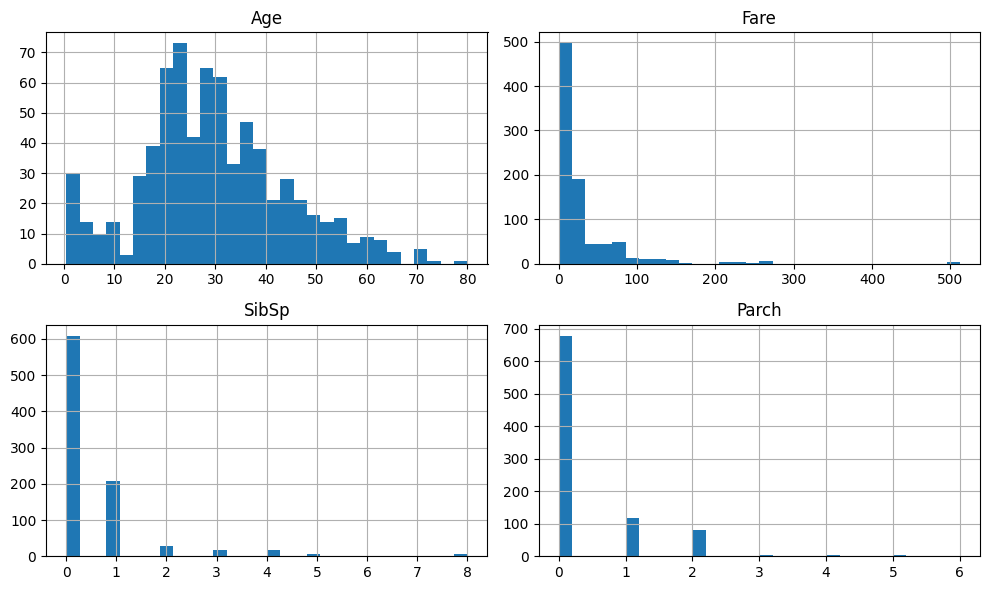

In [21]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
data[numeric_cols].hist(bins=30, figsize=(10,6), layout=(2,2))
plt.tight_layout()
plt.show()

Based on the histograms for Age, Fare, SibSp, and Parch, the following key distributions are observed:

Age
Distribution: Slightly right-skewed.

Key Finding: The majority of passengers were young adults (peaking sharply in the 20-30 year range). A notable number of infants/children are also present.

Fare
Distribution: Highly, positively right-skewed.

Key Finding: The vast majority of passengers paid a very low fare. A small number of extreme outliers paid very high fares ($200+), likely representing high-class travelers. This feature may require logarithmic transformation.

SibSp & Parch (Family Features)
Distribution: Both features are discrete and zero-inflated.

Key Finding: Most passengers traveled alone (Mode = 0 for both features). Counts drop off rapidly for values ≥1. These features are candidates for combining into a single FamilySize variable or binarizing (Traveled Alone vs. With Family).

## Univariate Analysis

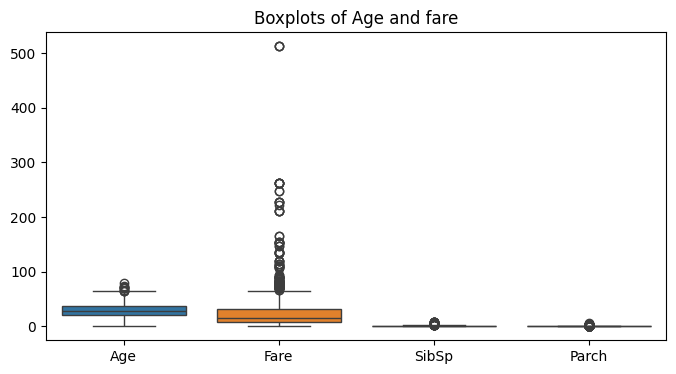

In [22]:
# Univaraite analysis for numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(8,4))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplots of Age and fare')
plt.show()

Fare Outliers: Fare exhibits the most significant presence of high-value outliers, which confirms the necessity of handling this feature (e.g., transformation or capping) before modeling.

Central Tendency: The median for SibSp and Parch is 0, emphasizing that the typical passenger traveled alone.

Age Spread: Age has a moderate spread but also contains upper-end outliers (older passengers).

C:\Users\himan\AppData\Local\Temp\ipykernel_30644\4040196439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette="Set2")
C:\Users\himan\AppData\Local\Temp\ipykernel_30644\4040196439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette="Set2")
C:\Users\himan\AppData\Local\Temp\ipykernel_30644\4040196439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[c

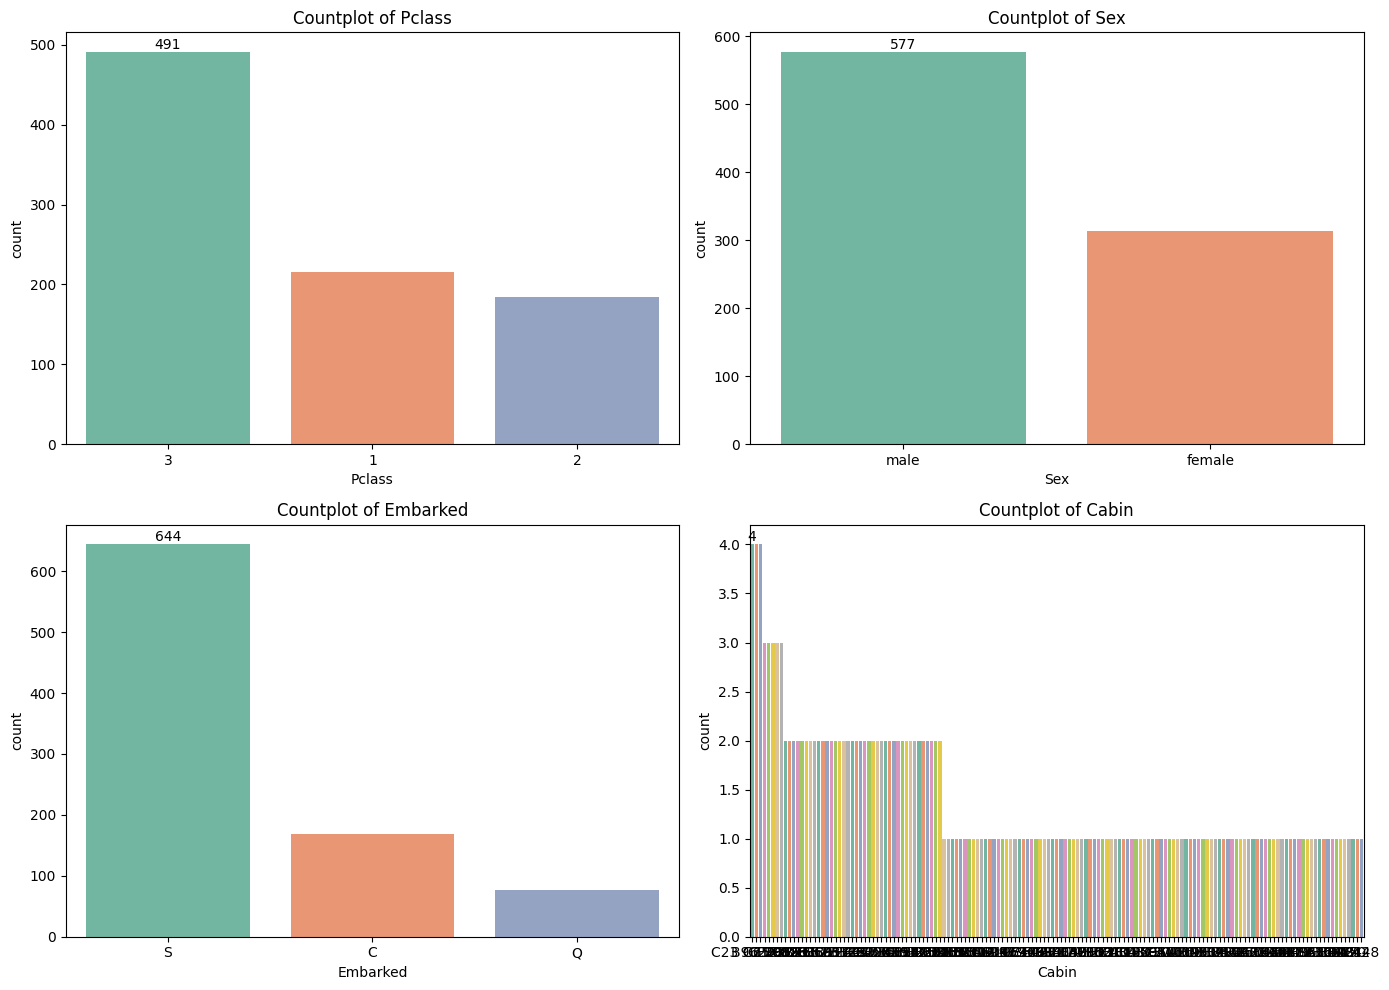

In [23]:
# univaraite analysis for categorical feature
# countplot for the categorical columns
# Setup subplot grid
cat_cols = ['Pclass','Sex','Embarked','Cabin']

#set up the figure grid
fig, axes = plt.subplots(2,2 ,figsize=(14,10))   # 2 rows , 2 columns
axes = axes.flatten()  # Flatten to easily loop

# Loop through the categorical columns
for i , col in enumerate(cat_cols):
    sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette="Set2")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].bar_label(axes[i].containers[0])    #Show counts on bars

plt.tight_layout()
plt.show()


- Pclass : The majority of passengers were traveling in the lowest socio-economic class.
- Sex : The dataset is significantly dominated by male passengers (approximately 2:1 ratio of male to female).
- Embarked : Most passengers boarded at Southampton.

# Bivariate Analysis

C:\Users\himan\AppData\Local\Temp\ipykernel_30644\2709259348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=data,palette="Set2")
C:\Users\himan\AppData\Local\Temp\ipykernel_30644\2709259348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=data,palette="Set2")
C:\Users\himan\AppData\Local\Temp\ipykernel_30644\2709259348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=data,palette="Set2")
C:\Users\himan\AppData\Local\Temp\ipykernel_30644\2709259348.py:

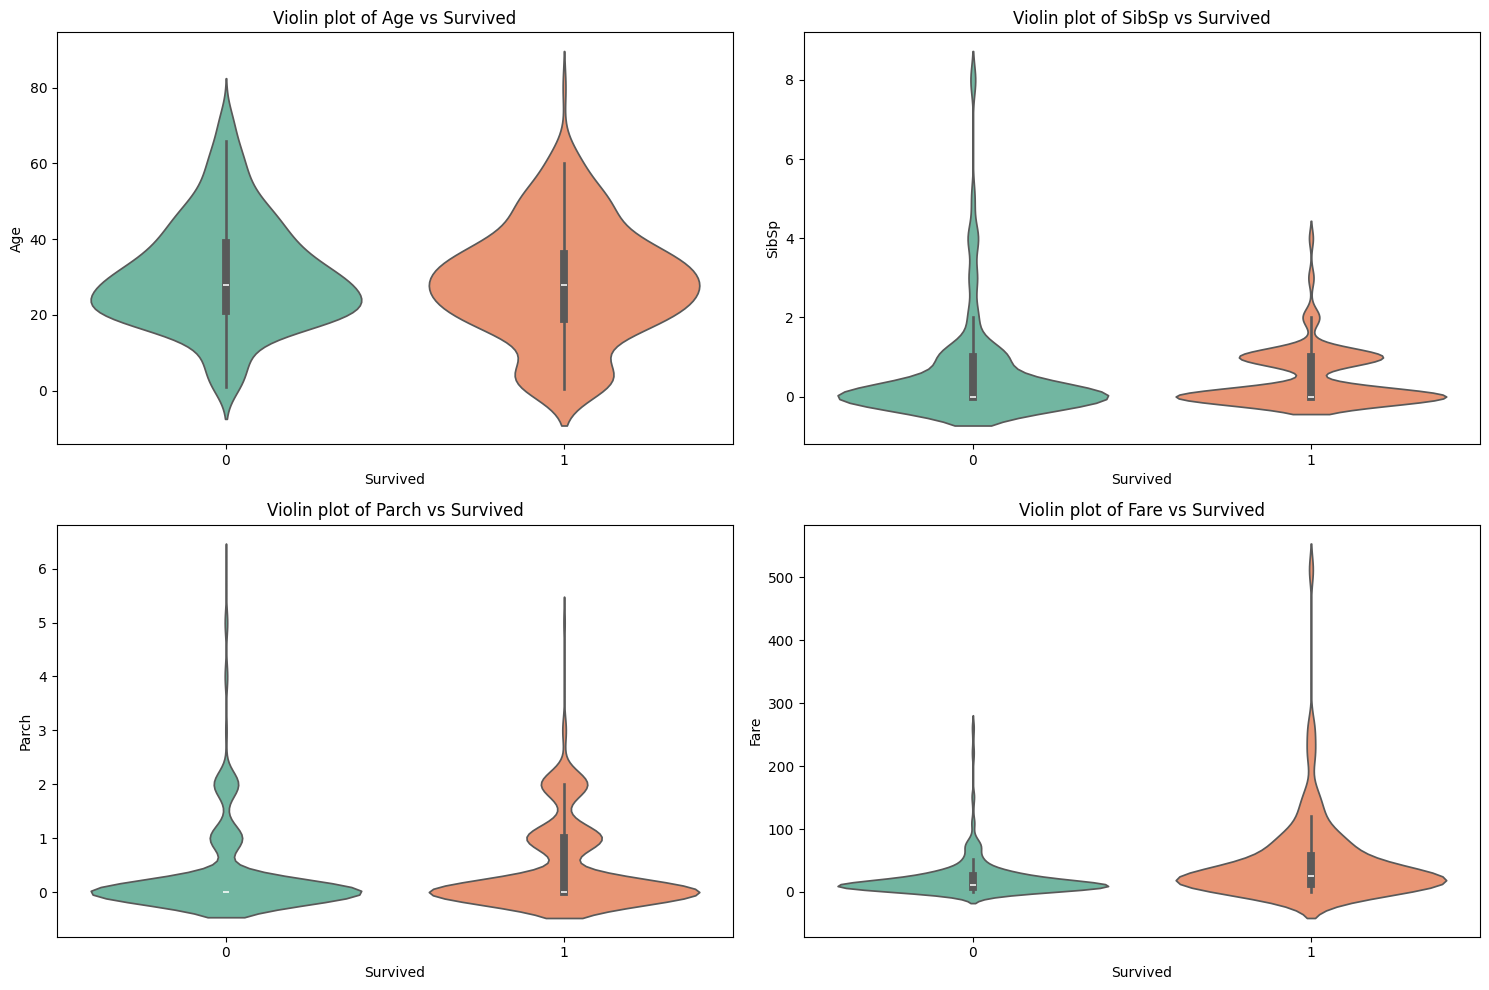

In [24]:
# Bivarate analysis for numerical column by violin plot

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15,10))

for i , col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.violinplot(x='Survived',y=col,data=data,palette="Set2")
    plt.title(f"Violin plot of {col} vs Survived")

plt.tight_layout()
plt.show()

**Key Insight**
- Infant Survival: Young children had a noticeable advantage in survival rates.
- Wealth Correlates: Passengers who paid higher fares (likely higher Pclass) had a much greater chance of survival.
- Small Group Advantage: Traveling with exactly one family member was better for survival than traveling alone or with a large group.
- Small Group Advantage: Having 1 or 2 children/parents offered a minor survival benefit over having none.

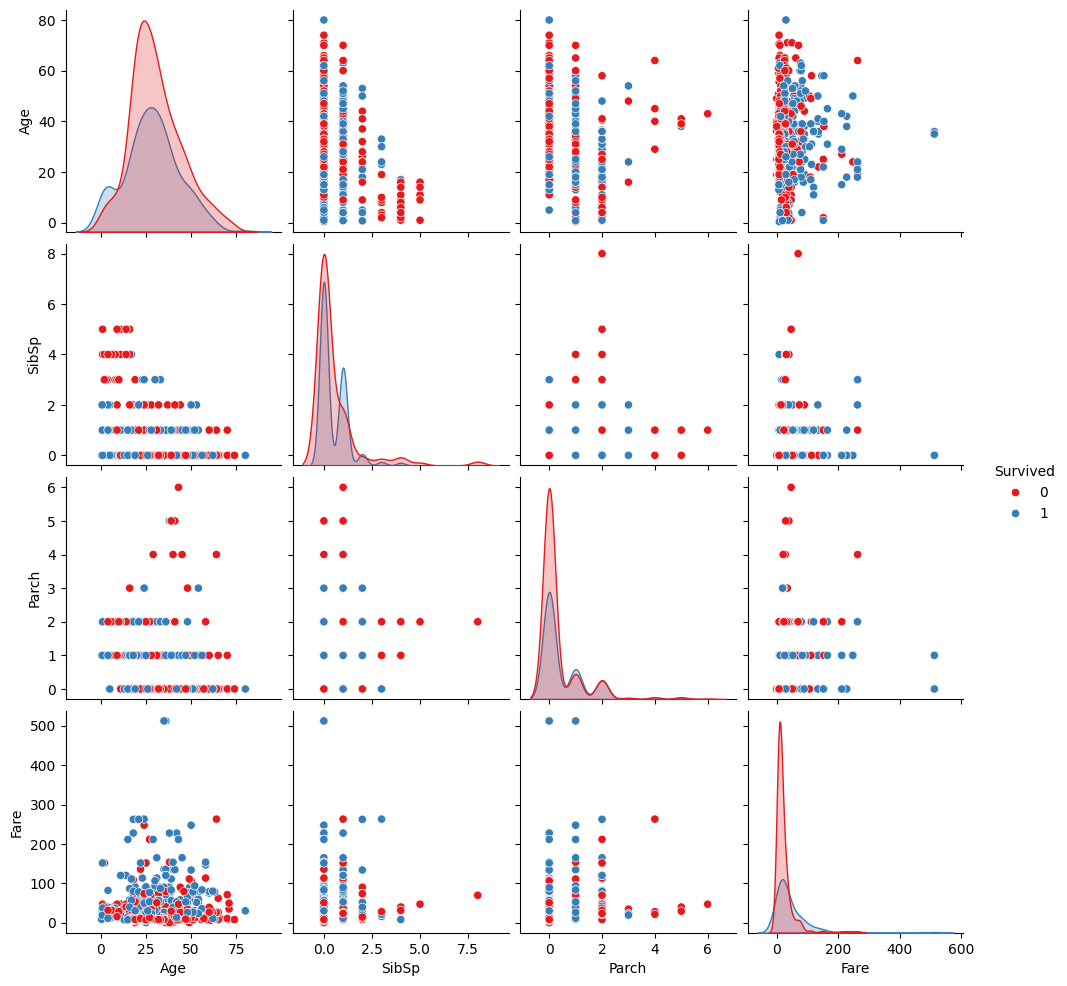

In [26]:
sns.pairplot(data[num_cols + ['Survived']] , hue = 'Survived' , palette="Set1", diag_kind="kde")
plt.show()

**Insights**
- Fare Dominates: Fare>100 is a very strong indicator of survival.
- Small Families Survive: The best chance of survival was with a small family unit (e.g., a couple, or a parent and one child).
- Risk at Prime Age: The highest density of non-survivors is among single travelers in the 20−35 age bracket who paid low fares.

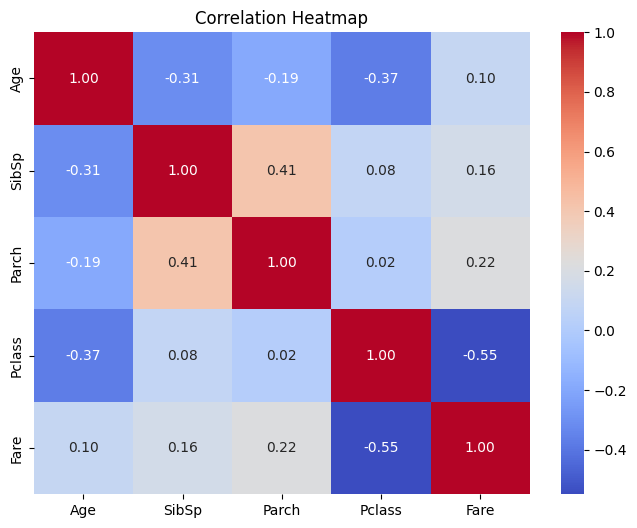

In [28]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['Age', 'SibSp', 'Parch', 'Pclass','Fare']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap Insights** 
The heatmap shows the Pearson correlation coefficients between Age, SibSp, Parch, Pclass, and Fare.

Strong Correlations (∣r∣≥0.40)
Pclass and Fare (r=−0.55): This is the strongest correlation. Higher Fare is strongly associated with a lower Pclass value (i.e., First Class Pclass=1).

SibSp and Parch (r=0.41): There is a moderate positive correlation. Passengers traveling with siblings/spouses often also traveled with parents/children, confirming these features describe the same underlying concept: Family Size.

Moderate Correlations (∣r∣≥0.30)
Age and Pclass (r=−0.37): Older passengers tend to be in higher classes (lower Pclass number).

Age and SibSp (r=−0.31): Younger passengers (children) tend to have more siblings/spouses (parents), suggesting families travel together.

Key Takeaways for Modeling
Redundancy in Family Size: SibSp and Parch are related (r=0.41), suggesting they should be combined into a single Family Size feature to avoid redundancy and improve model performance.

Pclass/Fare Dependency: The strong correlation between Pclass and Fare means these two features convey similar information about passenger wealth/status.

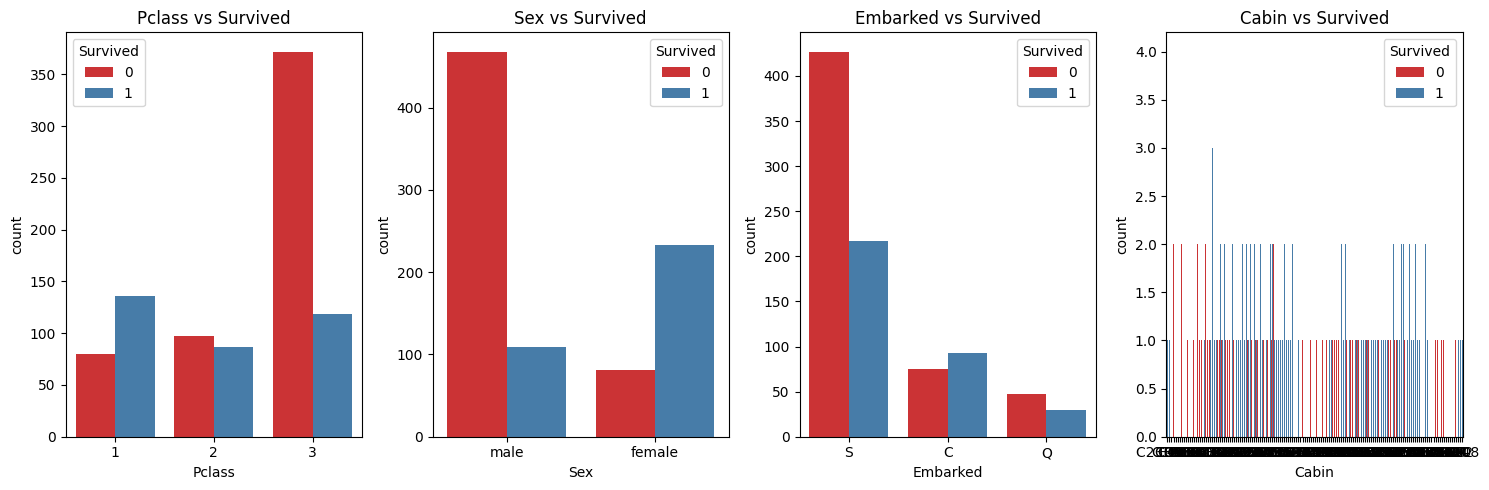

In [29]:
# Bivaraite analysis for categorical columns vs categorical columns
plt.figure(figsize=(15,5))
for i , col in enumerate(cat_cols,1):
    plt.subplot(1,len(cat_cols),i)
    sns.countplot(data=data,x=col,hue="Survived",palette="Set1")
    plt.title(f"{col} vs Survived")

plt.tight_layout()
plt.show()

**Categorical Bivariate Insights** (Categorical vs. Survived)
Pclass vs. Survived
Strong Gradient: Survival rate is highest for Pclass=1 (First Class) and lowest for Pclass=3 (Third Class).

Third Class Risk: The vast majority of passengers who died were in Pclass=3.

Sex vs. Survived
Most Predictive Feature: This is the most significant indicator. The vast majority of males died, while a majority of females survived (following the "women and children first" protocol).

Embarked vs. Survived
Cherbourg (C) Advantage: Passengers who embarked at Cherbourg (C) have a survival count (≈150) that is slightly higher than the death count (≈75), suggesting a survival advantage compared to other ports.

Southampton (S) Risk: Passengers who embarked at Southampton (S) have the lowest survival rate by count, heavily dominated by deaths.

Cabin vs. Survived
Data Sparsity: The visualization for Cabin is extremely sparse, indicating the feature has too many unique values and a high proportion of missing data (not explicitly shown but implied by the few bars).

Conclusion: This feature is currently too messy to provide meaningful insights without significant feature engineering (e.g., extracting the first letter).

# Multivariate Analysis

In [40]:
# pltting the cross tab for cat + cat + target
pd.crosstab([data['Pclass'], data['Sex']], data['Survived'], normalize='index') * 100


Survived               0          1
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669

**Multivariate Insights**: Pclass and Sex vs. Survived
The interaction between Sex and Pclass is highly predictive of survival probability:

Female Survival (High Priority)
First Class (Pclass=1): Near-certain survival (≈96.8%).

Second Class (Pclass=2): Extremely high survival (≈92.1%).

Third Class (Pclass=3): Survival is dramatically lower, at exactly 50%.

Insight: While women were prioritized, the effect of Pclass was significant, as Third Class women were the most vulnerable female group.

Male Survival (Low Priority)
First Class (Pclass=1): Survival rate is highest for males (≈36.9%).

Second/Third Class (Pclass=2 & Pclass=3): Survival is extremely low (≈15.7% and ≈13.5%, respectively).

Insight: Being a male in Pclass=2 or Pclass=3 offered almost no chance of survival, demonstrating the strict "women and children first" protocol.

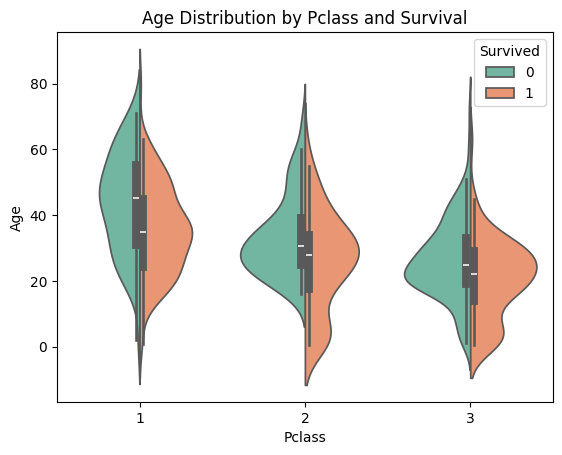

In [32]:
# Numerical + categorical + Target
sns.violinplot(data= data, x = "Pclass" , y="Age", hue="Survived", split=True, palette="Set2")
plt.title("Age Distribution by Pclass and Survival")
plt.show()


Children: Across all classes, survival probability is notably higher for the youngest passengers.

Vulnerability: For all classes, the median age for non-survivors (Survived=0) is slightly higher than the median age for survivors (Survived=1).

Oldest Passengers: Very old passengers (≈60−80) are present almost exclusively in Pclass=1 (both survivors and non-survivors).

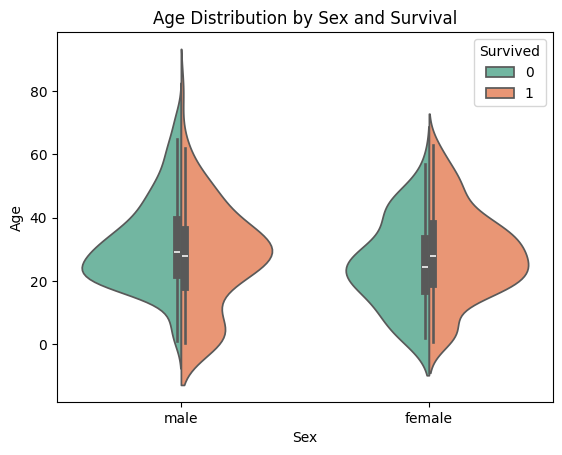

In [47]:
# Numerical + Categorical + Target
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, palette="Set2")
plt.title("Age Distribution by Sex and Survival")
plt.show()


Bimodal Survival: Female survivors show a wide distribution, primarily peaking in the 20s and 30s. The non-survivor distribution is concentrated in the adult ages (20s-40s).
The median age for non-surviving females (≈30) is slightly higher than the median age for surviving females.

Females: Women in the 20-40 age range who perished generally had a slightly higher median age than those who survived, but the overall survival rate remains very high.

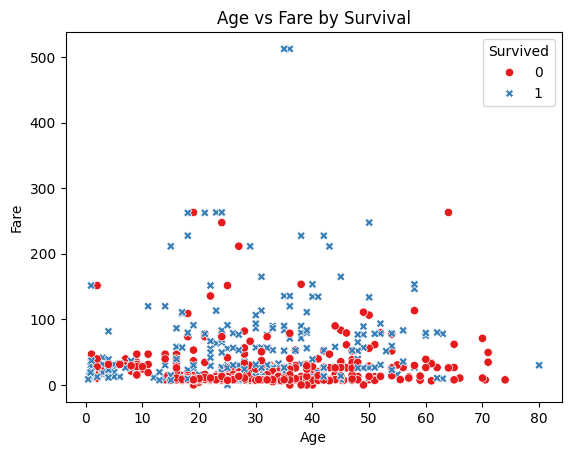

In [49]:
# Numerical + Numerical + Target
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', style='Survived', palette="Set1")
plt.title("Age vs Fare by Survival")
plt.show()


The multivariate analysis of Age and Fare against Survival reveals a strong combined effect of economic status and life stage: survival rates are dramatically higher for passengers who paid high fares (≥$100), regardless of age, confirming that Pclass=1 (high status) was the single greatest predictor of survival. Conversely, while most passengers paid low fares, the highest density of non-survivors is concentrated in this low-fare, adult (Age≈20−40) group, consistent with the high casualty rate among Pclass=3 males. Children (Age 0−10) show better survival than any other low-fare age group, reinforcing the "children first" protocol, but overall, Fare (status) served as a crucial gatekeeper for survival above all other numerical factors.